In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv(r"..\Cases\Recency Frequency Monetary\rfm_data_customer.csv", index_col=0)
df.drop('most_recent_visit',inplace= True, axis = 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 39999 entries, 22086 to 19184
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   revenue           39999 non-null  int64
 1   number_of_orders  39999 non-null  int64
 2   recency_days      39999 non-null  int64
dtypes: int64(3)
memory usage: 1.2 MB


In [15]:
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(df)
df_scaled = scaler.transform(df)
clust = KMeans(n_clusters=2, random_state=24)
clust.fit(df_scaled)
print(clust.inertia_)


68988.486688459


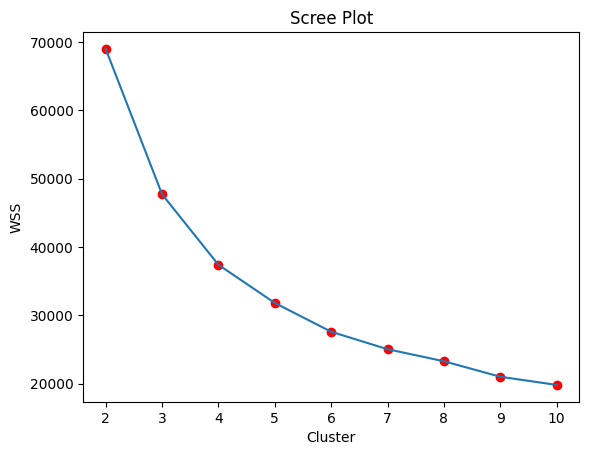

In [17]:
Ks = range(2,11)
scores = []
s_scores = []
for i in Ks:
    clust = KMeans(n_clusters=i, random_state=24)
    clust.fit(df_scaled)
    scores.append(clust.inertia_)
    s_scores.append(silhouette_score(df_scaled, clust.labels_))


# sns.lineplot(x=Ks, y=scores)
plt.scatter(Ks, scores, c='r')
plt.plot(Ks, scores)
plt.title('Scree Plot')
plt.xlabel('Cluster')
plt.ylabel('WSS')
plt.show()

In [23]:
i_max = np.argmax(s_scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", s_scores[i_max])

Best no. of clusters: 3
Best Score: 0.37102897041720206


In [24]:
clust = KMeans(n_clusters=Ks[i_max], random_state=24)
clust.fit(df_scaled)

KMeans(n_clusters=3, random_state=24)

In [25]:
clust_data = df.copy()
clust_data['Clust'] = clust.labels_

In [26]:
print(clust_data.groupby('Clust').mean())
print(clust_data['Clust'].value_counts())

           revenue  number_of_orders  recency_days
Clust                                             
0      1281.119459         12.909267    133.255123
1       749.292247          8.227773    136.139784
2       692.414498          7.351090    416.697185
Clust
1    18457
0    14934
2     6608
Name: count, dtype: int64


In [29]:
clust_data.groupby('Clust').corr()

revenue  number_of_orders  recency_days
Clust                                                           
0     revenue           1.000000          0.608137     -0.010057
      number_of_orders  0.608137          1.000000     -0.057150
      recency_days     -0.010057         -0.057150      1.000000
1     revenue           1.000000          0.633329     -0.011593
      number_of_orders  0.633329          1.000000     -0.047350
      recency_days     -0.011593         -0.047350      1.000000
2     revenue           1.000000          0.799252     -0.100518
      number_of_orders  0.799252          1.000000     -0.158976
      recency_days     -0.100518         -0.158976      1.000000

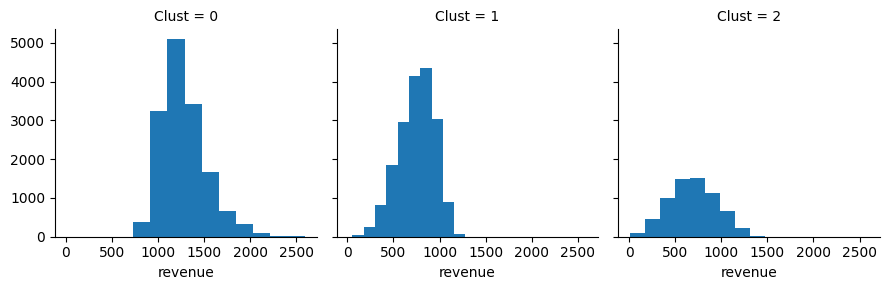

In [27]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(plt.hist, 'revenue')
plt.show()

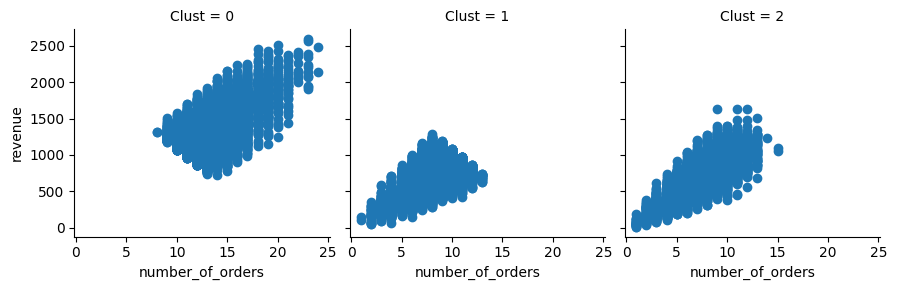

In [30]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(plt.scatter, 'number_of_orders', 'revenue')
plt.show()

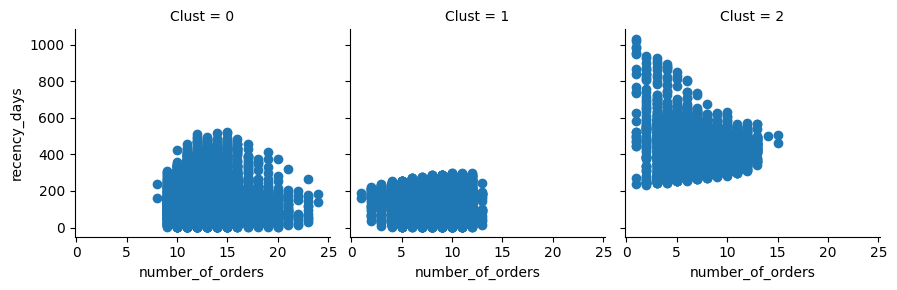

In [31]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(plt.scatter, 'number_of_orders', 'recency_days')
plt.show()

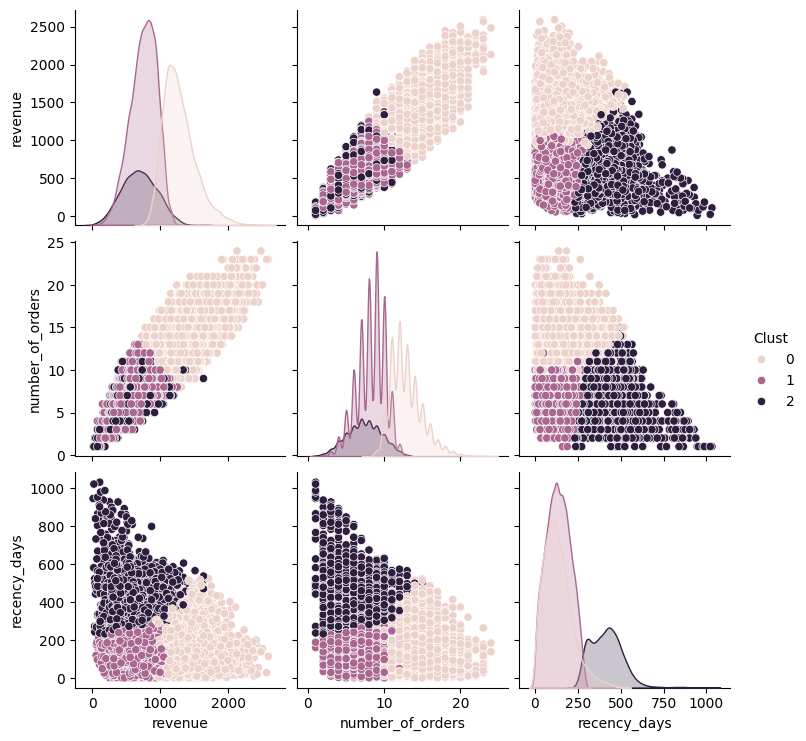

In [34]:
sns.pairplot(clust_data,hue='Clust')

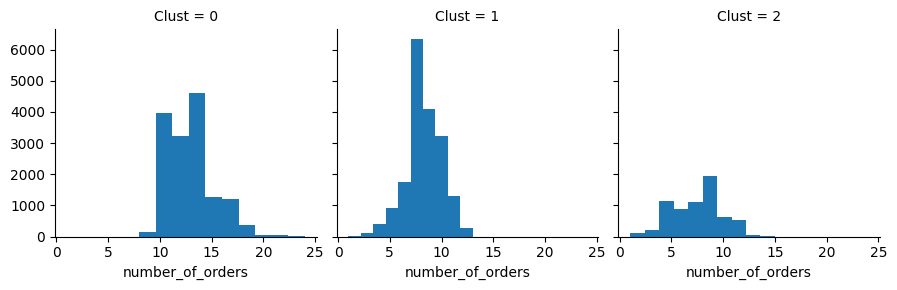

In [36]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(plt.hist, 'number_of_orders')
plt.show()

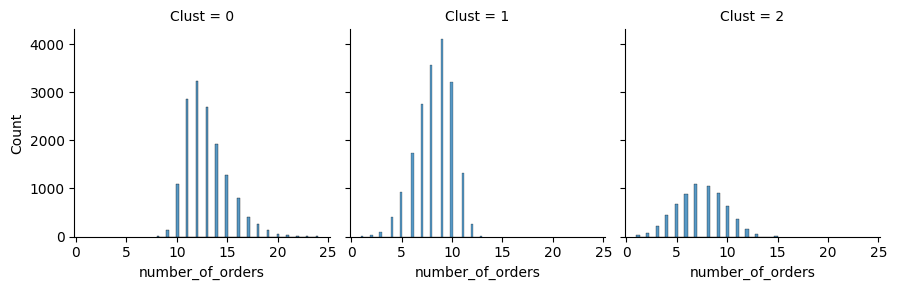

In [37]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(sns.histplot, 'number_of_orders')
plt.show()

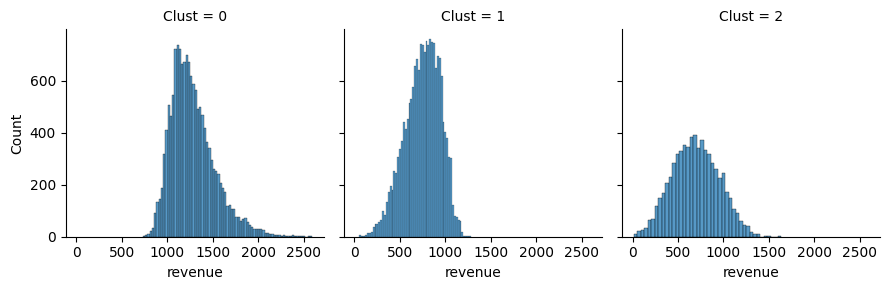

In [39]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(sns.histplot, 'revenue')
plt.show()

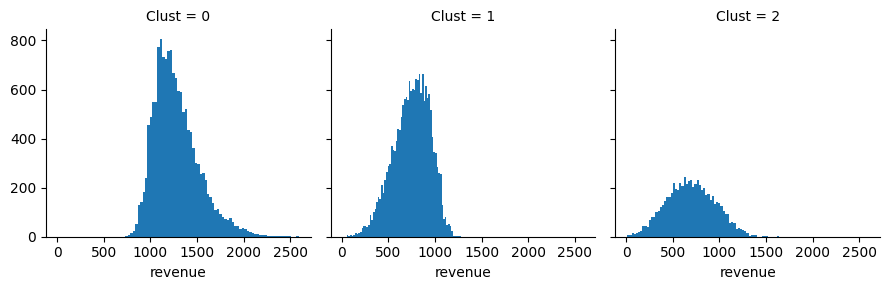

In [45]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(plt.hist, 'revenue', bins=70)
plt.show()

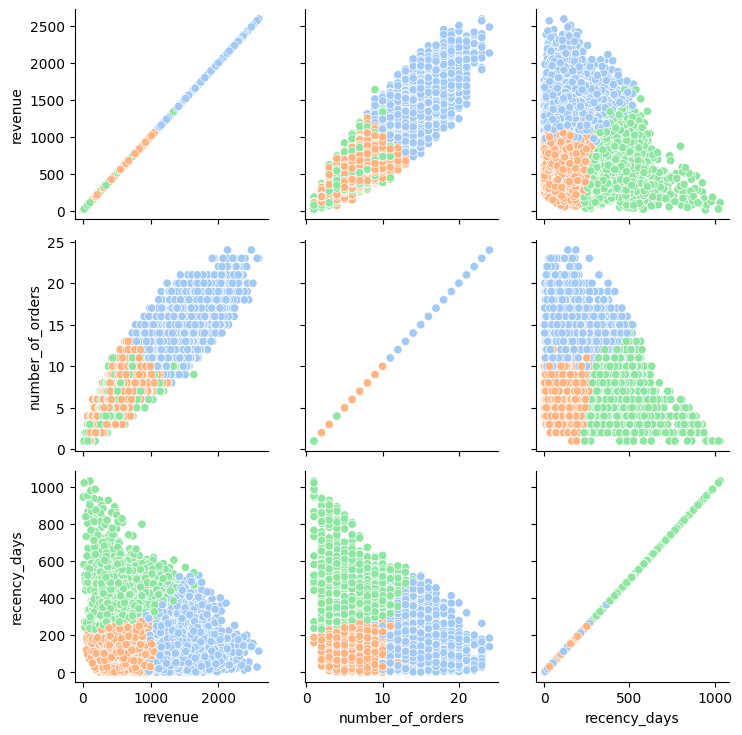

In [65]:
g = sns.PairGrid(clust_data, hue='Clust', palette = 'pastel')
g.map(sns.scatterplot,)